<a href="https://colab.research.google.com/github/tara618/symmetrical-octo-palm-tree/blob/main/ML_Lab1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
purchase = pd.read_excel(r'/Lab Session1 Data.xlsx',sheet_name="Purchase data")
irctc = pd.read_excel(r'/Lab Session1 Data.xlsx', sheet_name= "IRCTC Stock Price")
df = pd.DataFrame(purchase)
df.drop(df.iloc[:, 5:22], axis=1, inplace=True)
print(df)

  Customer  Candies (#)  Mangoes (Kg)  Milk Packets (#)  Payment (Rs)
0      C_1           20             6                 2           386
1      C_2           16             3                 6           289
2      C_3           27             6                 2           393
3      C_4           19             1                 2           110
4      C_5           24             4                 2           280
5      C_6           22             1                 5           167
6      C_7           15             4                 2           271
7      C_8           18             4                 2           274
8      C_9           21             1                 4           148
9     C_10           16             2                 4           198


In [ ]:
pur_chase = df.iloc[0:9,1:4]
A=np.array(pur_chase)
C_full =df.iloc[0:9,4]
C = np.array(C_full)
C = C.reshape(9,1)
print(C)

[[386]
 [289]
 [393]
 [110]
 [280]
 [167]
 [271]
 [274]
 [148]]


In [ ]:
print("Dimensionality of the matrix is", df.shape)
print("The rank of matrix is ", np.linalg.matrix_rank(pur_chase))


Dimensionality of the matrix is (10, 5)
The rank of matrix is  3


In [ ]:
Y = np.linalg.pinv(A)
print(Y)


[[-0.01029074 -0.03304951  0.01017895  0.02894814  0.01827148  0.01045111
  -0.0080467   0.00072602  0.01661679]
 [ 0.0907317   0.07382695  0.03170332 -0.09063689 -0.01891929 -0.06850066
   0.05697434  0.03167646 -0.07587941]
 [ 0.00524254  0.17851348 -0.05838688 -0.06472439 -0.06273987  0.04626489
   0.01906939 -0.00820036  0.00926846]]


In [ ]:
X = np.dot(Y,C)
print("Solution is", X)

Solution is [[ 1.]
 [55.]
 [18.]]


In [ ]:
print("Cost of candy is", X[0])
print("COst of mango is", X[1])
print("Cost of milk packet is", X[2])

Cost of candy is [1.]
COst of mango is [55.]
Cost of milk packet is [18.]


In [ ]:
new_df = df
status_pay = []
for row in df['Payment (Rs)']:
  if row < 200 :
    status_pay.append('Poor')
  elif row>=200 :
    status_pay.append('Rich')
new_df['Pay']= status_pay
print(new_df)

  Customer  Candies (#)  Mangoes (Kg)  Milk Packets (#)  Payment (Rs)   Pay
0      C_1           20             6                 2           386  Rich
1      C_2           16             3                 6           289  Rich
2      C_3           27             6                 2           393  Rich
3      C_4           19             1                 2           110  Poor
4      C_5           24             4                 2           280  Rich
5      C_6           22             1                 5           167  Poor
6      C_7           15             4                 2           271  Rich
7      C_8           18             4                 2           274  Rich
8      C_9           21             1                 4           148  Poor
9     C_10           16             2                 4           198  Poor


In [ ]:
irctc_df = pd.DataFrame(irctc)
print(irctc_df)

             Date Month  Day    Price     Open     High      Low   Volume  \
0    Jun 29, 2021   Jun  Tue  2081.85  2092.00  2126.90  2065.05    1.67M   
1    Jun 28, 2021   Jun  Mon  2077.75  2084.00  2112.45  2068.40  707.73K   
2    Jun 25, 2021   Jun  Fri  2068.85  2084.35  2088.50  2053.10  475.82K   
3    Jun 24, 2021   Jun  Thu  2072.95  2098.00  2098.00  2066.00  541.51K   
4    Jun 23, 2021   Jun  Wed  2078.25  2102.00  2111.40  2072.00  809.62K   
..            ...   ...  ...      ...      ...      ...      ...      ...   
244  Jul 07, 2020   Jul  Tue  1397.40  1410.00  1411.00  1390.05  480.21K   
245  Jul 06, 2020   Jul  Mon  1400.75  1405.50  1415.50  1394.00  614.93K   
246  Jul 03, 2020   Jul  Fri  1405.10  1415.00  1425.00  1398.00  599.49K   
247  Jul 02, 2020   Jul  Thu  1412.35  1440.00  1467.80  1395.30    2.16M   
248  Jul 01, 2020   Jul  Wed  1363.05  1363.65  1377.00  1356.00  383.00K   

       Chg%  
0    0.0020  
1    0.0043  
2   -0.0020  
3   -0.0026  
4   -

In [ ]:
irctc_mean = irctc_df["Price"].mean()
print("The mean is ", irctc_mean)

The mean is  1560.6634538152612


In [ ]:
irctc_var = irctc_df["Price"].var()
print("The variance is ", irctc_var)

The variance is  58732.36535253918


In [ ]:
wednes_mean = irctc_df.loc[irctc_df['Day'] == 'Wed', 'Price'].mean()
print(wednes_mean)
print("The sales at IRCTC are less during Wednesdays.")

1550.7060000000001
The sales at IRCTC are less during Wednesdays.


In [ ]:
apr_mean = irctc_df.loc[irctc_df['Month'] == 'Apr', 'Price'].mean()
print(apr_mean)
print("The sales at IRCTC are higher during the month of April.")

1698.9526315789474
The sales at IRCTC are higher during the month of April.


In [ ]:
no_of_neg = 0

for index,row in irctc_df.iterrows():
    if row['Chg%'] < 0:
        no_of_neg+=1

print("Probability of loss+ ",no_of_neg/irctc_df.shape[0])

probability of loss+  0.4979919678714859


In [ ]:
no_of_wed=0
no_of_wed_pos=0

for index,row in irctc_df.iterrows():
    if row['Day']=='Wed':
        if row['Chg%']>0:
            no_of_wed_pos+=1
        no_of_wed+=1

print("Probability of getting a profit on Wednesday= ",no_of_wed_pos/no_of_wed)

Probability of getting a profit on Wednesday=  0.42


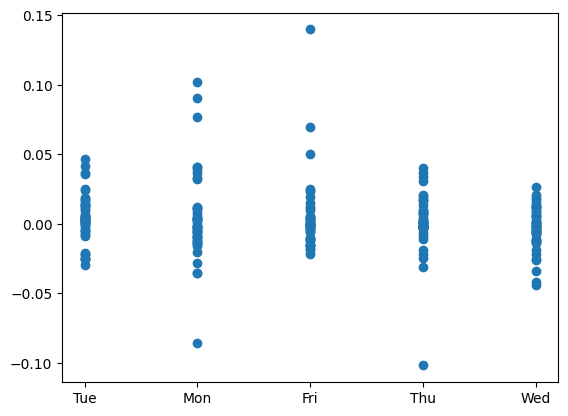

In [ ]:
import matplotlib.pyplot as plt
days= []
chg= []
for index,row in irctc_df.iterrows():
    days.append(row['Day'])
    chg.append(row['Chg%'])


plt.scatter(days, chg)
plt.show()